# Temas Tratados en el Trabajo Práctico 4

* Representación del Conocimiento y Razonamiento Lógico.

* Estrategias de resolución de hipótesis: Encadenamiento hacia Adelante, Encadenamiento hacia Atrás y Resolución por Contradicción.

* Representación basada en circuitos.

## Ejercicios Teóricos

1. ¿Qué es una inferencia?

Es el proceso de derivar nuevas sentencias verdaderas a partir de una base de conocimientos usando reglas de deducción válidas

2. ¿Cómo se verifica que un modelo se infiere de la base de conocimientos?

Para verificar si algo se infiera de la base de conocimientos (BK) hay dos formas:

Por significado (semántico):
Consiste en mirar todos los casos posibles en los que la BK es verdadera.
Si en todos esos casos también se cumple la conclusión que queremos, entonces podemos decir que efectivamente se infiere.
(Ejemplo: con una tabla de verdad, revisás que cada vez que la BK es cierta, también lo es la conclusión).

Por reglas de deducción (sintáctico):
Consiste en aplicar paso a paso las reglas de la BK hasta ver si logramos llegar a la conclusión.
Si a partir de las reglas y hechos de la BK podemos derivar la conclusión, significa que se infiere.
(Ejemplo: usar encadenamiento hacia adelante o hacia atrás hasta alcanzar la hipótesis).

3. Observe la siguiente base de conocimiento:

$R1: b ∧ c → a$

$R2: d ∧ e → b$

$R3: g ∧ e → b$

$R4: e → c$

$R5: d$

$R6: e$

$R7: a ∧ g → f$

3.1 ¿Cómo se puede probar que $a = True$ a través del encadenamiento hacia adelante? Este método solamente usa reglas ya incorporadas a la base de conocimiento para inferir la hipótesis, ¿qué propiedad debe tener el algoritmo para asegurar que esta inferencia sea posible?

3.2 ¿Cómo se puede probar que $a = True$ a través del encadenamiento hacia atrás? Este método asigna un valor de verdad a la hipótesis y deriva las sentencias de la base de conocimiento, ¿qué propiedad debe tener el algoritmo para asegurar que esta derivación sea posible?

3.3 Exprese la base de conocimiento en su Forma Normal Conjuntiva. A continuación, demuestre por contradicción que $a = True$.

3.1 Encadenamiento hacia adelante  

El encadenamiento hacia adelante arranca con los **hechos que ya conocemos** (en este caso: que `d` y `e` son verdaderos) y va aplicando las reglas como si fueran recetas.

1. Como `d` y `e` son verdaderos, la regla **R2** nos dice que entonces `b` también lo es.  
2. Como `e` es verdadero, la regla **R4** nos dice que entonces `c` también lo es.  
3. Ahora, como ya tenemos `b` y `c`, la regla **R1** nos dice que `a` es verdadero.  


3.2 Encadenamiento hacia atrás  

El encadenamiento hacia atrás parte de lo que **queremos probar** (en este caso: `a`) e intenta justificarlo.  

1. Para que `a` sea verdadero, la regla **R1** nos dice que necesitamos que `b` y `c` lo sean.  
   - Para `b`: la regla **R2** dice que se cumple si tenemos `d` y `e`. Y ya sabemos que ambos son hechos.  
   - Para `c`: la regla **R4** dice que se cumple si tenemos `e`. Y ya sabemos que `e` es hecho.  
2. Como tanto `b` como `c` se cumplen, entonces `a` también se cumple.  


3.3 Demostración por contradicción  

La idea es probar que `a` es verdadero **suponiendo lo contrario** y viendo si eso lleva a una contradicción.  

1. Supongamos que `a` es falso.  
2. A partir de los hechos `d` y `e`, la regla **R2** nos dice que `b` es verdadero.  
3. Con `e`, la regla **R4** nos dice que `c` es verdadero.  
4. Como ahora tenemos `b` y `c`, la regla **R1** nos dice que `a` debe ser verdadero.  
5. Pero eso contradice nuestra suposición de que `a` era falso.  
 


4. Diseñe con lógica proposicional basada en circuitos las proposiciones *OrientadoDerecha* y *Agente ubicado en la casilla [1,2]* para el mundo de wumpus de 4x4. Dibuje el circuito correspondiente.

(C1,2 ∧ Od) ∧ Avanzar = C1,3

![image.png](moveV2.png)


5. El nonograma es un juego en el cual se posee un tablero en blanco y cada fila y columna presenta información sobre la longitud de un bloque en dicha fila/columna. Además, la leyenda puede indicar más de un número, indicando esto que existen varios bloques de las longitudes mostradas por la leyenda y en el mismo orden, separados por al menos un espacio vacío.

Resuelva el nonograma de la imagen de abajo escribiendo en primer lugar cada regla que puede incorporarse a la base de conocimientos inicial e incorporando cada inferencia que realice.

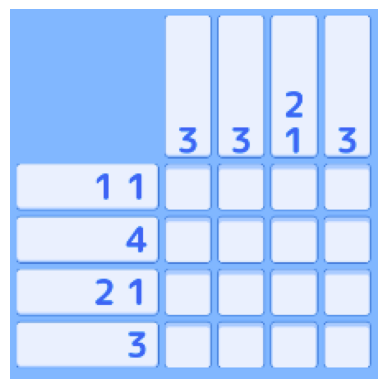

In [1]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# URL directa de Google Drive
url = "https://drive.google.com/uc?export=view&id=1SKiXvrI_TX-U4sbw60TYSRmaNYyFixmI"

# Descargar la imagen
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Mostrar la imagen
plt.imshow(img)
plt.axis('off')  # Ocultar ejes
plt.show()

# Nonograma 4x4

Denoto celdas por `(fila, columna)` y usaré `■ = llena` y `· = vacía`.

## Pistas

**Por fila:**  
- F1 = [1,1]  
- F2 = [4]  
- F3 = [2,1]  
- F4 = [3]  

**Por columna:**  
- C1 = [3]  
- C2 = [3]  
- C3 = [2,1]  
- C4 = [3]  

## Reglas básicas

1. En una fila/columna con pista “n” y longitud 4:
   - `[4]` ⇒ las 4 celdas son `■`.  
   - `[3]` ⇒ hay exactamente 3 `■` contiguas.  
   - `[1,1]` ⇒ dos `■` separadas por al menos una `·`.  
   - `[2,1]` ⇒ un bloque de 2 `■`, luego (al menos) una `·`, luego una `■`.  
2. Toda inferencia debe respetar simultáneamente filas y columnas.

## Inferencias paso a paso

**A. F2 = [4]**  

(2,1)(2,2)(2,3)(2,4) = `■ ■ ■ ■`

Esto “ancla” una `■` en cada columna.

**B. C3 = [2,1]** con `(2,3)=■`  
- El bloque de 2 solo puede ser `(1,3)-(2,3)`; si fuera `(2,3)-(3,3)` no queda espacio para la `·` obligatoria antes del “1”.  
- ⇒ `(1,3)=■`, `(3,3)=·` y el “1” restante cae en `(4,3)=■`.

**C. F1 = [1,1]** y ya tenemos `(1,3)=■`  
- La otra `■` no puede ser adyacente (ni en c2 ni en c4).  
- ⇒ `(1,1)=■`, `(1,2)=·`, `(1,4)=·`.

**D. C1 = [3]** y ya `(1,1)=■`, `(2,1)=■`  
- Para formar 3 contiguas en una columna de 4, debe ser `(1,1)(2,1)(3,1)=■ ■ ■`  
- ⇒ `(3,1)=■`, `(4,1)=·`.

**E. C2 = [3]** con `(1,2)=·` y `(2,2)=■`  
- Única posibilidad contigua: `(2,2)(3,2)(4,2)=■ ■ ■`  
- ⇒ `(3,2)=■`, `(4,2)=■`.

**F. C4 = [3]** con `(1,4)=·` y `(2,4)=■`  
- Única posibilidad contigua: `(2,4)(3,4)(4,4)=■ ■ ■`  
- ⇒ `(3,4)=■`, `(4,4)=■`.

**G. Comprobaciones por filas restantes:**  
- F3 ahora es `(3,1)(3,2)=■ ■`, `(3,3)=·`, `(3,4)=■` ⇒ cumple `[2,1]`.  
- F4 es `(4,1)=·`, `(4,2)(4,3)(4,4)=■ ■ ■` ⇒ cumple `[3]`.

## Solución final

F1: `■ · ■ ·`
F2: `■ ■ ■ ■`
F3: `■ ■ · ■`
F4: `· ■ ■ ■`


**Coordenadas llenas:**  
`(1,1)(1,3)(2,1)(2,2)(2,3)(2,4)(3,1)(3,2)(3,4)(4,2)(4,3)(4,4)`


## Ejercicios de Implementación

6. Implementar un motor de inferencia con encadenamiento hacia adelante. Pruébelo con las proposiciones del ejercicio 3.

In [31]:
# 1. Base de conocimiento
# Las reglas se representan como tuplas: (antecedentes, consecuente)
# Los antecedentes son una lista de strings
reglas = [
    (['b', 'c'], 'a'),  # R1: b ∧ c → a
    (['d', 'e'], 'b'),  # R2: d ∧ e → b
    (['g', 'e'], 'b'),  # R3: g ∧ e → b
    (['e'], 'c'),       # R4: e → c
    (['a', 'g'], 'f')   # R7: a ∧ g → f
]

# Hechos iniciales (hechos que no dependen de ninguna regla)
hechos_iniciales = ['d', 'e'] # R5: d, R6: e

# 2. Motor de inferencia con encadenamiento hacia adelante
def encadenamiento_hacia_adelante(reglas, hechos_iniciales):
    hechos_conocidos = set(hechos_iniciales)
    hechos_nuevos = set(hechos_iniciales)
    
    while hechos_nuevos:
        hechos_recientemente_derivados = set()
        
        for antecedente, consecuente in reglas:
            # Comprobar si el antecedente de la regla es verdadero
            antecedente_verdadero = all(h in hechos_conocidos for h in antecedente)
            
            # Si el antecedente es verdadero y la conclusión no se conoce aún
            if antecedente_verdadero and consecuente not in hechos_conocidos:
                print(f"Regla: {' ∧ '.join(antecedente)} → {consecuente}")
                print(f"Se ha inferido el hecho '{consecuente}'")
                hechos_recientemente_derivados.add(consecuente)
        
        # Si no se ha derivado nada nuevo, se termina el bucle
        if not hechos_recientemente_derivados:
            break
        
        # Actualizar la lista de hechos conocidos para la próxima iteración
        hechos_conocidos.update(hechos_recientemente_derivados)
        hechos_nuevos = hechos_recientemente_derivados
        
    return sorted(list(hechos_conocidos))

# 3. Ejecución y prueba
print("--- Aplicando encadenamiento hacia adelante ---")
hechos_finales = encadenamiento_hacia_adelante(reglas, hechos_iniciales)
print("\nHechos finales inferidos:")
print(hechos_finales)

--- Aplicando encadenamiento hacia adelante ---
Regla: d ∧ e → b
Se ha inferido el hecho 'b'
Regla: e → c
Se ha inferido el hecho 'c'
Regla: b ∧ c → a
Se ha inferido el hecho 'a'

Hechos finales inferidos:
['a', 'b', 'c', 'd', 'e']


In [32]:
# Versión con sympy

from sympy import symbols, And, Implies

# Símbolos
a, b, c, d, e, f, g = symbols('a b c d e f g')

# Reglas
R1 = Implies(And(b, c), a)
R2 = Implies(And(d, e), b)
R3 = Implies(And(g, e), b)
R4 = Implies(e, c)
R7 = Implies(And(a, g), f)

rules = [R1, R2, R3, R4, R7]

# Hechos iniciales
facts = {d, e}

def forward_chaining_steps(rules, known_facts):
    new_facts = set(known_facts)
    added = True
    step = 1
    while added:
        added = False
        print(f"\n--- Paso {step} ---")
        for rule in rules:
            if isinstance(rule, Implies):
                premises = rule.args[0].args if isinstance(rule.args[0], And) else [rule.args[0]]
                if all(premise in new_facts for premise in premises) and rule.args[1] not in new_facts:
                    print(f"Se cumple la regla: {rule}, agregando hecho: {rule.args[1]}")
                    new_facts.add(rule.args[1])
                    added = True
        step += 1
    print("\nHechos finales inferidos:", new_facts)
    return new_facts

forward_chaining_steps(rules, facts)



--- Paso 1 ---
Se cumple la regla: Implies(d & e, b), agregando hecho: b
Se cumple la regla: Implies(e, c), agregando hecho: c

--- Paso 2 ---
Se cumple la regla: Implies(b & c, a), agregando hecho: a

--- Paso 3 ---

Hechos finales inferidos: {c, e, b, a, d}


{a, b, c, d, e}

7. Implementar un motor de inferencia con encadenamiento hacia atrás. Pruébelo con las proposiciones del ejercicio 3.

In [27]:
# 1. Base de conocimiento
# Para el encadenamiento hacia atrás, es más eficiente usar un diccionario
# donde la clave es el consecuente y el valor son los antecedentes.
reglas_hacia_atras = {
    'a': [['b', 'c']],    # R1: b ∧ c → a
    'b': [['d', 'e'], ['g', 'e']], # R2: d ∧ e → b, R3: g ∧ e → b
    'c': [['e']],         # R4: e → c
    'f': [['a', 'g']]     # R7: a ∧ g → f
}

# Hechos iniciales
hechos_iniciales = {'d', 'e'} # R5: d, R6: e

# 2. Motor de inferencia con encadenamiento hacia atrás
def encadenamiento_hacia_atras(objetivo, hechos_conocidos, reglas):
    print(f"Buscando objetivo: '{objetivo}'")

    # Si el objetivo ya es un hecho conocido, la búsqueda termina con éxito
    if objetivo in hechos_conocidos:
        print(f"El objetivo '{objetivo}' ya es un hecho conocido.")
        return True

    # Buscar reglas que puedan inferir el objetivo
    if objetivo not in reglas:
        print(f"No hay reglas que puedan inferir '{objetivo}'.")
        return False

    # Probar cada conjunto de antecedentes para inferir el objetivo
    for antecedentes in reglas[objetivo]:
        todos_los_antecedentes_probados = True
        print(f" Intentando probar '{objetivo}' con los antecedentes: {antecedentes}")
        
        for antecedente in antecedentes:
            # Llamada recursiva para probar cada antecedente como un nuevo objetivo
            if not encadenamiento_hacia_atras(antecedente, hechos_conocidos, reglas):
                todos_los_antecedentes_probados = False
                break  # Si un antecedente falla, no es necesario probar el resto
        
        if todos_los_antecedentes_probados:
            print(f"El objetivo '{objetivo}' se ha probado con éxito.")
            return True

    print(f"El objetivo '{objetivo}' no se puede probar.")
    return False

# 3. Prueba
# Para probar el motor, seleccionamos un objetivo.
objetivo_a_probar = 'g'
print(f"--- Aplicando encadenamiento hacia atrás para probar '{objetivo_a_probar}' ---")
if encadenamiento_hacia_atras(objetivo_a_probar, hechos_iniciales, reglas_hacia_atras):
    print(f"\n¡Conclusión: '{objetivo_a_probar}' es verdadero! ✅")
else:
    print(f"\n¡Conclusión: '{objetivo_a_probar}' es falso! ❌")

--- Aplicando encadenamiento hacia atrás para probar 'g' ---
Buscando objetivo: 'g'
No hay reglas que puedan inferir 'g'.

¡Conclusión: 'g' es falso! ❌


In [33]:
# Versión con sympy

from sympy import symbols, And, Implies

# -------------------------
# Definir símbolos
# -------------------------
a, b, c, d, e, f, g = symbols('a b c d e f g')

# -------------------------
# Definir reglas
# -------------------------
R1 = Implies(And(b, c), a)
R2 = Implies(And(d, e), b)
R3 = Implies(And(g, e), b)
R4 = Implies(e, c)
R7 = Implies(And(a, g), f)

rules = [R1, R2, R3, R4, R7]

# -------------------------
# Hechos iniciales
# -------------------------
facts = {d, e}

# -------------------------
# Motor de inferencia backward chaining paso a paso
# -------------------------
def backward_chaining_steps(goal, rules, known_facts, depth=0):
    indent = "  " * depth
    if goal in known_facts:
        print(f"{indent}El hecho '{goal}' ya es conocido")
        return True
    
    for rule in rules:
        if isinstance(rule, Implies) and rule.args[1] == goal:
            premises = rule.args[0].args if isinstance(rule.args[0], And) else [rule.args[0]]
            print(f"{indent}Intentando inferir '{goal}' usando la regla: {rule}")
            if all(backward_chaining_steps(p, rules, known_facts, depth + 1) for p in premises):
                print(f"{indent}Todos los antecedentes de '{goal}' se cumplen, agregando '{goal}'")
                known_facts.add(goal)
                return True

    print(f"{indent}No se puede inferir '{goal}' con los hechos conocidos")
    return False

# -------------------------
# Ejecutar backward chaining
# -------------------------
goal = f
result = backward_chaining_steps(goal, rules, set(facts))

print("\nResultado final:", result)


Intentando inferir 'f' usando la regla: Implies(a & g, f)
  Intentando inferir 'a' usando la regla: Implies(b & c, a)
    Intentando inferir 'b' usando la regla: Implies(d & e, b)
      El hecho 'd' ya es conocido
      El hecho 'e' ya es conocido
    Todos los antecedentes de 'b' se cumplen, agregando 'b'
    Intentando inferir 'c' usando la regla: Implies(e, c)
      El hecho 'e' ya es conocido
    Todos los antecedentes de 'c' se cumplen, agregando 'c'
  Todos los antecedentes de 'a' se cumplen, agregando 'a'
  No se puede inferir 'g' con los hechos conocidos
No se puede inferir 'f' con los hechos conocidos

Resultado final: False


8. Implementar un motor de inferencia por contradicción que detecte si el conjunto de proposiciones del ejercicio 3 es inconsistente.

In [28]:
# Función para convertir una proposición a su forma clausal
def a_clausal(prop):
    if '→' in prop:
        antecedente, consecuente = prop.split('→')
        antecedente = antecedente.replace(' ', '')
        consecuente = consecuente.replace(' ', '')
        # ¬(A ∧ B) ∨ C  = ¬A ∨ ¬B ∨ C
        antecedentes = antecedente.split('∧')
        return [f'¬{lit}' for lit in antecedentes] + [consecuente]
    else:
        return [prop]

# 1. Base de Conocimiento en formato de texto
proposiciones = [
    'b ∧ c → a',
    'd ∧ e → b',
    'g ∧ e → b',
    'e → c',
    'd',
    'e',
    'a ∧ g → f'
]

# 2. Convertir todas las proposiciones a cláusulas
clausulas = [a_clausal(p) for p in proposiciones]


print("Cláusulas iniciales:")
for c in clausulas:
    print(c)

# 3. Motor de inferencia por resolución
def resolver(clausulas):
    resolventes_nuevos = set()
    for i in range(len(clausulas)):
        for j in range(i + 1, len(clausulas)):
            clausula1 = clausulas[i]
            clausula2 = clausulas[j]
            
            # Buscar literales complementarios
            for lit1 in clausula1:
                if lit1.startswith('¬'):
                    complemento = lit1[1:]
                else:
                    complemento = '¬' + lit1
                
                if complemento in clausula2:
                    # Derivar una nueva cláusula
                    nueva_clausula = list(set(clausula1 + clausula2))
                    nueva_clausula.remove(lit1)
                    nueva_clausula.remove(complemento)
                    
                    # Si la nueva cláusula es vacía, encontramos una contradicción
                    if not nueva_clausula:
                        print(f"\nSe ha derivado la cláusula vacía [] a partir de {clausula1} y {clausula2}.")
                        return True
                    
                    # Si la nueva cláusula no existe, la añadimos al conjunto de resolventes
                    if tuple(sorted(nueva_clausula)) not in [tuple(sorted(c)) for c in clausulas] and \
                       tuple(sorted(nueva_clausula)) not in resolventes_nuevos:
                        resolventes_nuevos.add(tuple(nueva_clausula))

    # Si no se derivaron nuevos resolventes, el proceso termina
    if not resolventes_nuevos:
        return False
    
    # Añadir los nuevos resolventes y continuar el proceso
    clausulas.extend([list(r) for r in resolventes_nuevos])
    return resolver(clausulas)

# Ejecutar el motor de inferencia
if resolver(clausulas):
    print("\n¡El conjunto de proposiciones es inconsistente! ❌")
else:
    print("\nEl conjunto de proposiciones es consistente. ✅")
    
# Para demostrar la inconsistencia, añadimos la negación de una proposición que se puede inferir
# Como sabemos que podemos inferir 'a', añadimos su negación '¬a'
clausulas.append(['¬a'])

if resolver(clausulas):
    print("\n¡El conjunto de proposiciones es inconsistente! ❌")
else:
    print("\nEl conjunto de proposiciones es consistente. ✅")


Cláusulas iniciales:
['¬b', '¬c', 'a']
['¬d', '¬e', 'b']
['¬g', '¬e', 'b']
['¬e', 'c']
['d']
['e']
['¬a', '¬g', 'f']

El conjunto de proposiciones es consistente. ✅

Se ha derivado la cláusula vacía [] a partir de ['a'] y ['¬a'].

¡El conjunto de proposiciones es inconsistente! ❌


In [34]:
#Version con sympy

from sympy import symbols
from sympy.logic.boolalg import Implies, And, Not
from sympy.logic.inference import satisfiable


# Definir símbolos proposicionales
a, b, c, d, e, f, g = symbols('a b c d e f g')

# Definir las reglas como fórmulas lógicas
R1 = Implies(And(b, c), a)
R2 = Implies(And(d, e), b)
R3 = Implies(And(g, e), b)
R4 = Implies(e, c)
R7 = Implies(And(a, g), f)

# Hechos iniciales
facts = And(d, e)   # R5 y R6

# Conjunto de conocimiento (KB)
KB = And(R1, R2, R3, R4, R7, facts)

print("Base de conocimiento (KB):", KB)

# --- Verificar consistencia ---
is_consistent = satisfiable(KB)
print("\n¿La KB es consistente?:", bool(is_consistent))

# --- Verificar contradicción explícita (ejemplo: agregar ¬d) ---
KB_contra = And(KB, Not(d))
is_consistent2 = satisfiable(KB_contra)
print("¿La KB con ¬d es consistente?:", bool(is_consistent2))


Base de conocimiento (KB): d & e & (Implies(e, c)) & (Implies(a & g, f)) & (Implies(b & c, a)) & (Implies(d & e, b)) & (Implies(e & g, b))

¿La KB es consistente?: True
¿La KB con ¬d es consistente?: False


# Bibliografía

[Russell, S. & Norvig, P. (2004) _Inteligencia Artificial: Un Enfoque Moderno_. Pearson Educación S.A. (2a Ed.) Madrid, España](https://www.academia.edu/8241613/Inteligencia_Aritificial_Un_Enfoque_Moderno_2da_Edici%C3%B3n_Stuart_J_Russell_y_Peter_Norvig)

[Poole, D. & Mackworth, A. (2023) _Artificial Intelligence: Foundations of Computational Agents_. Cambridge University Press (3a Ed.) Vancouver, Canada](https://artint.info/3e/html/ArtInt3e.html)